# Задача 3

Вычислить интегралы 

$$ I_{3a} = \int_{-1}^{1}{\frac{dx}{1+x^2}} $$

$$ I_{3b} = \int_{0}^{1}{x^{\frac{1}{3}} e^{sin x}dx} $$

методами трапеций и Симпсона, разделив отрезок интегрирования на 4, 8, 16 интервалов. Как убывает погрешность численного интегрирования с ростом числа интервалов? 

### Задаем подынтегральные функции и пределы интегрирования:

In [1]:
import math
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_3a(x):
    return 1/(1 + x*x)

def f_3b(x):
    return np.power(x, 1/3)*np.exp(np.sin(x))

In [3]:
a_3a = -1
b_3a = 1
a_3b = 0
b_3b = 1

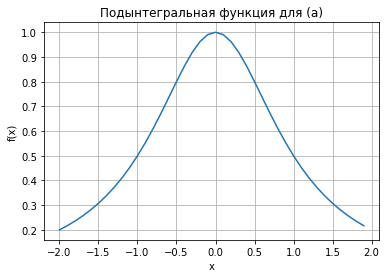

In [4]:
x_3a = np.arange(a_3a - 1, b_3a + 1, 0.1)
plt.plot(x_3a, f_3a(x_3a))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Подынтегральная функция для (а)')
plt.show()

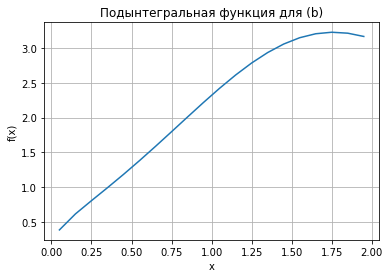

In [5]:
x_3b = np.arange(a_3b, b_3b + 1, 0.1)
plt.plot(x_3b, f_3b(x_3b))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Подынтегральная функция для (b)')
plt.show()

In [6]:
I_3a_ans = 1.57079632679
I_3b_ans = 1.29587400873

## Метод трапеций

Разбиваем отрезок $[a, b]$ на $N$ частей $[x_0, x_1] ... [x_{N-1}, x_N]$, длина отрезков $x_i - x_{i -1} = h = const$. Тогда интеграл: 

$$  S_{[a, b]} \approx h \cdot (\frac{1}{2}f_0 + f_1 + ... + f_{N-1} + \frac{1}{2}f_N), $$

где $f_i = f(x_i)$

Асимптотическая оценка остаточного члена: 

$$R = - \frac{h^2}{12}\int_{a}^{b}f''(x)dx + O(h^3)$$

То есть при увеличении числа интервалов N ошибка в формуле трапеции убывает как $O(h^2) \sim 1/N^2$

### Определем функцию для интегрирования

* f - подынтегральная функция
* N - число интервалов разбиения
* $[a, b]$ - отрезок интегрирования
* h - ширина интервалов разбиения

In [7]:
def trapezoidal_method(f, N, a, b):
    h = (b - a)/N
    S = 0
    f_xi = f(a) #f(x_i)
    f_xi1 = 0 #f(x_i+1)
    for i in range (1, N+1):
        f_xi1 = f(a + i*h)
        S += f_xi + f_xi1
        f_xi = f_xi1
    S = h*S/2
    return S  

### Задаем различные N

In [8]:
N_s = [i for i in range (1, 501, 10)]
len(N_s)

500

### Интегрируем (3а) формулой трапеции:

In [9]:
res_a_trapezoid = []
err_a_trapezoid = []
for N in N_s:
    S = trapezoidal_method(f_3a, N, a_3a, b_3a)
    res_a_trapezoid.append(S)
    err_a_trapezoid.append(np.abs(S - I_3a_ans))
    
print(res_a_trapezoid[len(N_s)-1])
print(err_a_trapezoid[len(N_s)-1])

1.5707949934615641
1.3333284358818531e-06


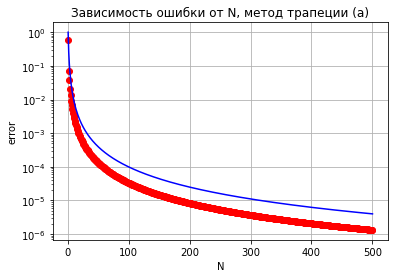

In [10]:
plt.plot(N_s, err_a_trapezoid, 'ro', N_s, [1/(N**2) for N in N_s], 'b')
plt.yscale("log")
plt.grid()
plt.xlabel('N')
plt.ylabel('error')
plt.title('Зависимость ошибки от N, метод трапеции (а)')
plt.show()

### Интегрируем (3b) формулой трапеции:

In [11]:
res_b_trapezoid = []
err_b_trapezoid = []
for N in N_s:
    S = trapezoidal_method(f_3b, N, a_3b, b_3b)
    res_b_trapezoid.append(S)
    err_b_trapezoid.append(np.abs(S - I_3b_ans))

print(res_b_trapezoid[len(N_s)-1])
print(err_b_trapezoid[len(N_s)-1])

1.2816569847702906
0.014217023959709474


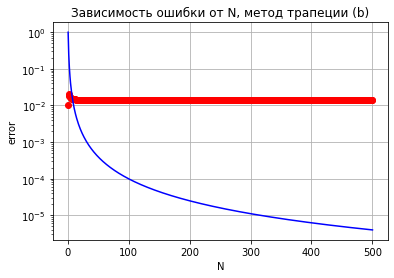

In [12]:
plt.plot(N_s, err_b_trapezoid, 'ro', N_s, [1/(N**2) for N in N_s], 'b')
plt.yscale("log")
plt.grid()
plt.xlabel('N')
plt.ylabel('error')
plt.title('Зависимость ошибки от N, метод трапеции (b)')
plt.show()

## Метод Симпсона

Складываем формулу для метода средних и формулу для метода трапеций:

$$ S{[a, b] \approx \frac{b-a}{6} \cdot [f(a) + 4f(\frac{a+b}{2} + f{b})]}$$

Вводя равномерную сетку $a = x_0, x_1, ..., x_{2k-1}, x_{2k} = b$, получаем составную формулу. 

Остаточный член: 

$$R = - \frac {h^4}{180} \int_{a}^{b} f^{(iv)}(x)dx + O(h^5)$$

При увеличении числа интервалов разбиения $N$ ошибка в формуле Симпсона убывает как $O(h^4) \sim 1/N^4$

### Определю функцию для интегрирования

* f - подынтегральная функция
* N - число интервалов разбиения
* $[a, b]$ - отрезок интегрирования
* h - ширина интервалов разбиения

In [ ]:
N_simp = [2*i for i in range (1, 501, 10)]
len(N_simp)

In [13]:
def simpson_method(f, N, a, b):
    h = (b - a)/N
    S = 0
    
    f_xi = f(a)
    f_x2 = 0 # значение функции в середине отрезка
    f_xi1 = 0
    
    for i in range (1, N+1):
        f_x2 = f(a + (i-1/2)*h)#center
        f_xi1 = f(a + i*h)
        S += f_xi + 4*f_x2 + f_xi1
        f_xi = f_xi1
        
    S = h*S/6
    return S

### Интегрирую (а) формулой Симпсона:

In [14]:
res_a_Simpson = []
err_a_Simpson = []
for N in N_simp:
    S = simpson_method(f_3a, N, a_3a, b_3a)
    res_a_Simpson.append(S)
    err_a_Simpson.append(np.abs(S - I_3a_ans))

print(res_a_Simpson[len(N_s)-1])
print(err_a_Simpson[len(N_s)-1])

1.5707963267948974
4.8974158062264905e-12


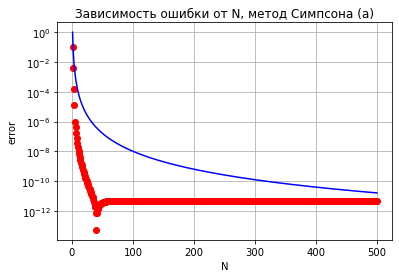

In [15]:
plt.plot(N_s, err_a_Simpson, 'ro', N_s, [1/(N**4) for N in N_s], 'b')
plt.yscale("log")
plt.grid()
plt.xlabel('N')
plt.ylabel('error')
plt.title('Зависимость ошибки от N, метод Симпсона (а)')
#plt.legend()
plt.show()

### Интегрирую (b) формулой Симпсона:

In [16]:
res_b_Simpson = []
err_b_Simpson = []
for N in N_simp:
    S = simpson_method(f_3b, N, a_3b, b_3b)
    res_b_Simpson.append(S)
    err_b_Simpson.append(np.abs(S - I_3b_ans))
    
print(res_b_Simpson[len(N_s)-1])
print(err_b_Simpson[len(N_s)-1])

1.2816572681463994
0.014216740583600673


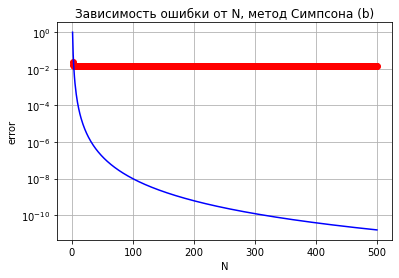

In [17]:
plt.plot(N_simp, err_b_Simpson, 'ro', N_simp, [1/(N**4) for N in N_s], 'b')
plt.yscale("log")
plt.grid()
plt.xlabel('N')
plt.ylabel('error')
plt.title('Зависимость ошибки от N, метод Симпсона (b)')
plt.show()

In [18]:
print(err_a_trapezoid[4])
print(err_a_trapezoid[8])
print(err_a_trapezoid[16])

print(err_a_Simpson[4])
print(err_a_Simpson[8])
print(err_a_Simpson[16])

0.013330263441583723
0.00411510700247586
0.0011533999024044839
9.386988120141382e-07
3.7282986475872804e-08
8.170315535238615e-10


In [19]:
print(err_b_trapezoid[4])
print(err_b_trapezoid[8])
print(err_b_trapezoid[16])

print(err_b_Simpson[4])
print(err_b_Simpson[8])
print(err_b_Simpson[16])

0.016273741301576106
0.01497849954625341
0.014450200213627973
0.014371029760588794
0.014241767086366819
0.014219520705650357
